# Customizing Seaborn plots
1. Changing plot style and color
2. Adding titles and labels

## 1.1 Changing plot style and color
By default, Seaborn plots are pleasing to look at, but there are several reasons you may want to change the appearance. 

Reasons to change style:

1. Personal Preference.

2. Improve readability.

3. Guide interpretation.




### 1.1.1 Changing the figure style
Seaborn has five preset figure styles which change the background and axes of the plot. You can refer to them by name:

1. "white" - The default style is called "white" and provides clean axes with a solid white background.

2. "dark" - provides a gray background.

3. "whitegrid" - adds a gray grid in the background. This is useful if you want your audience to be able to determine the specific values of the plotted points instead of making higher level observations.

4. "darkgrid" - provides a gray background with a white grid.

5.  "ticks" - similar to "white", but adds small tick marks to the x- and y-axes.

To set one of these as the global style for all of your plots, use the "set style" function.

 sns.set_style( )

### 1.1.2  Changing the palette
You can change the color of the main elements of the plot with Seaborn's "set_palette" function. Seaborn has many preset color palettes that you can refer to by name, or you can create your own custom palette. 



#### Diverging palettes
Seaborn has a group of preset palettes called diverging palettes that are great to use if your visualization deals with a scale where the two ends of the scale are opposites and there is a neutral midpoint. Here are some examples of diverging palettes - red/blue and purple/green. Note that if you append the palette name with "_r", you can reverse the palette.

'RdBu', 'PRGn', 'RdBu_r', 'PRGn_r'

#### Sequential palettes
Another group of palettes are called sequential palettes. These are a single color (or two colors blended) moving from light to dark values. Sequential palettes are great for emphasizing a variable on a continuous scale. One example is this plot depicting the relationship between a car's horsepower and its miles per gallon, where points grow larger and darker when the car has more cylinders.

'Greys', 'Blues', 'PuRd', 'GnBu' 

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load datasets
survey = pd.read_csv('young-people-survey-responses.csv',index_col=0)
survey.head()


,Music,Techno,Movies,History,Mathematics,Pets,Spiders,Loneliness,Parents' advice,Internet usage,Finances,Age,Siblings,Gender,Village - town
0,5.0,1.0,5.0,1.0,3.0,4.0,1.0,3.0,4.0,few hours a day,3.0,20.0,1.0,female,village
1,4.0,1.0,5.0,1.0,5.0,5.0,1.0,2.0,2.0,few hours a day,3.0,19.0,2.0,female,city
2,5.0,1.0,5.0,1.0,5.0,5.0,1.0,5.0,3.0,few hours a day,2.0,20.0,2.0,female,city
3,5.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,2.0,most of the day,2.0,22.0,1.0,female,city
4,5.0,2.0,5.0,3.0,2.0,1.0,1.0,3.0,3.0,few hours a day,4.0,20.0,1.0,female,village


In [3]:
survey['Parents\' advice'].unique()

array([ 4.,  2.,  3.,  1.,  5., nan])

In [4]:
# Rename Parents advice column.
survey.rename(columns={'Parents\' advice': 'parents_advice'}, inplace=True)
survey.columns

Index(['Music', 'Techno', 'Movies', 'History', 'Mathematics', 'Pets',
       'Spiders', 'Loneliness', 'parents_advice', 'Internet usage', 'Finances',
       'Age', 'Siblings', 'Gender', 'Village - town'],
      dtype='object')

In [5]:
# create a new column p_advice
survey.loc[survey['parents_advice'] == 1, 'p_advice'] = 'Never'
survey.loc[survey['parents_advice'] == 2, 'p_advice'] = 'Rarely'
survey.loc[survey['parents_advice'] == 3, 'p_advice'] = 'Sometimes'
survey.loc[survey['parents_advice'] == 4, 'p_advice'] = 'Often'
survey.loc[survey['parents_advice'] == 5, 'p_advice'] =  'Always'

In [6]:
# Confirm the new column
survey.head()

,Music,Techno,Movies,History,Mathematics,Pets,Spiders,Loneliness,parents_advice,Internet usage,Finances,Age,Siblings,Gender,Village - town,p_advice
0,5.0,1.0,5.0,1.0,3.0,4.0,1.0,3.0,4.0,few hours a day,3.0,20.0,1.0,female,village,Often
1,4.0,1.0,5.0,1.0,5.0,5.0,1.0,2.0,2.0,few hours a day,3.0,19.0,2.0,female,city,Rarely
2,5.0,1.0,5.0,1.0,5.0,5.0,1.0,5.0,3.0,few hours a day,2.0,20.0,2.0,female,city,Sometimes
3,5.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,2.0,most of the day,2.0,22.0,1.0,female,city,Rarely
4,5.0,2.0,5.0,3.0,2.0,1.0,1.0,3.0,3.0,few hours a day,4.0,20.0,1.0,female,village,Sometimes


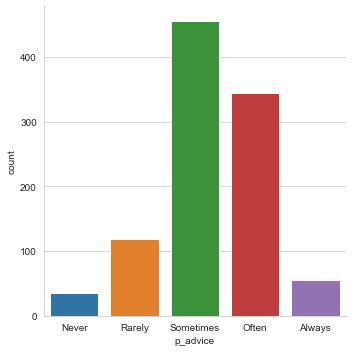

In [7]:
# Set the style to "whitegrid" to help the audience determine the number of responses in each category.
sns.set_style('whitegrid')

# Create a count plot of survey responses
category_order = ['Never', 'Rarely', 'Sometimes', 'Often', 'Always']

sns.catplot(x='p_advice', data=survey, kind='count', order=category_order)

# Show plot
plt.show()

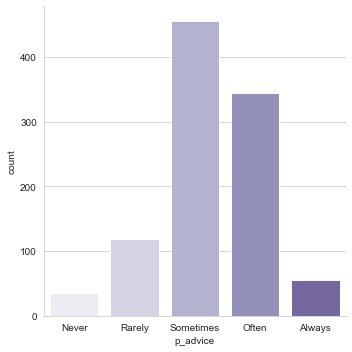

In [8]:
# Set the color palette to the sequential palette named "Purples".
sns.set_style('whitegrid')
sns.set_palette('Purples')

category_order = ['Never', 'Rarely', 'Sometimes', 'Often', 'Always']
sns.catplot(x='p_advice', data=survey, kind='count', order=category_order)

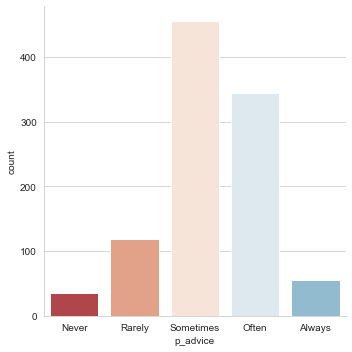

In [9]:
# Change the color palette to the diverging palette named "RdBu".
sns.set_style('whitegrid')
sns.set_palette('RdBu')

category_order = ['Never', 'Rarely', 'Sometimes', 'Often', 'Always']
sns.catplot(x='p_advice', data=survey, kind='count', order=category_order)

This style and diverging color palette best highlights the difference between the number of young people who usually listen to their parents' advice versus those who don't.

### 1.1.3 Changing the scale
Finally, you can change the scale of your plot by using the "set context" function. The scale options from smallest to largest are "paper", "notebook", "talk", and "poster". The default context is "paper". For a larger context, you'll want to choose a larger scale like "talk" for posters or presentations where the audience is further away from the plot.

Does the percentage of people reporting that they feel lonely vary depending on how many siblings they have? Let's find out using a bar plot, while also exploring Seaborn's four different plot scales ("contexts").

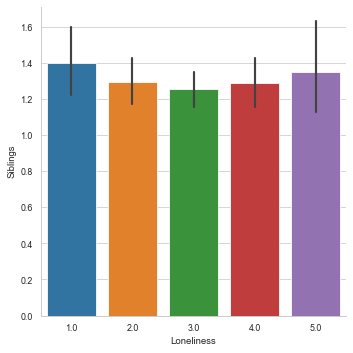

In [10]:
# Set the scale ("context") to "paper", which is the smallest of the scale options.
sns.set_context('paper')
sns.set_palette('tab10')
sns.catplot(x='Loneliness', y='Siblings', data=survey, kind='bar')

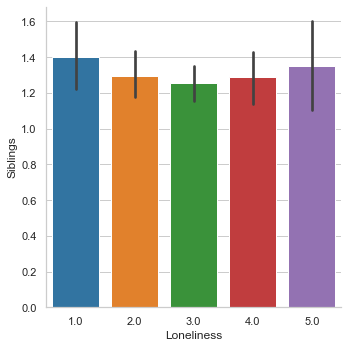

In [11]:
# Change the context to "notebook" to increase the scale.

sns.set_context('notebook')

sns.catplot(x='Loneliness', y='Siblings', data=survey, kind='bar')

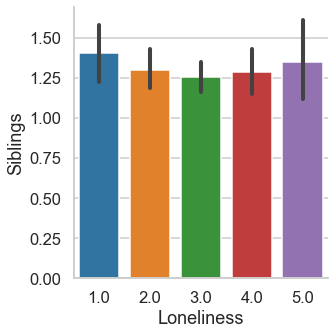

In [12]:
# Change the context to "talk" to increase the scale.

sns.set_context('talk')

sns.catplot(x='Loneliness', y='Siblings', data=survey, kind='bar')


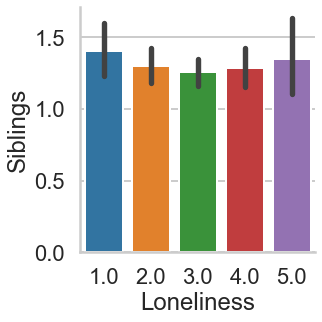

In [13]:
# Change the context to "poster", which is the largest scale available.

sns.set_context('poster')

sns.catplot(x='Loneliness', y='Siblings', data=survey, kind='bar')


#### Custom palettes
You can also create your own custom palettes by passing in a list of color names...or a list of hex color codes.

custom_palette = ['Red','Green','Blue']

sns.set_palette(custom_palette)

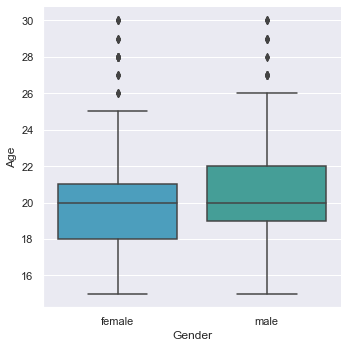

In [14]:
# Set the style to "darkgrid"
sns.set_style('darkgrid')
sns.set_context('notebook')
# Set a custom color palette
custom_palette =['#39A7D0', '#36ADA4']
sns.set_palette(custom_palette)
# Create the box plot of age distribution by gender
sns.catplot(x='Gender', y='Age', 
            data=survey, kind='box')
# Show plot
plt.show()

## 1.2 Adding Titles and Labels



We create data visualizations to communicate information, and we can't do that effectively without a clear title and informative axis labels. 

### FacetGrid vs. AxesSubplot objects
Before we go into the details of adding a title, we need to understand an underlying mechanism in Seaborn. Seaborn's plot functions create two different types of objects:

 FacetGrids and AxesSubplots. 
 
 To figure out which type of object you're working with, first assign the plot output to a variable. In the documentation, the variable is often named "g", so we'll do that here as well. Write "type" "g" to return the object type. 
 
 g = sns.scatterplot(x='height', y='weight' data=df)

 type(g)
 
 This scatter plot is an AxesSubplot.

### An Empty FacetGrid
A FacetGrid consists of one or more AxesSubplots, which is how it supports subplots.

### FacetGrid vs. AxesSubplot objects
Recall that "relplot( )" and "catplot( )" both support making subplots. This means that they are creating FacetGrid objects. In contrast, single-type plot functions like "scatterplot( )" and "countplot( )" return a single AxesSubplot object.

### 1.2.1 Adding a title to FacetGrid
Recall that "catplot( )" enables subplots, so it returns a FacetGrid object. To add a title to a FacetGrid object, first assign the plot to the variable "g". After you assign the plot to "g", you can set the title using "g.fig.suptitle". This tells Seaborn you want to set a title for the figure as a whole.

### Adjusting height of title in FacetGrid
Note that by default, the figure title might be a little low. To adjust the height of the title, you can use the "y" parameter. The default value is 1, so setting it to 1 point 03 will make it a little higher than the default. This is inside g.fig.suptitle. 

g.fig.suptitle('newTitle', y=1.03)



In [15]:
# import dataset
mpg = pd.read_csv('mpg.csv')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


seaborn.axisgrid.FacetGrid

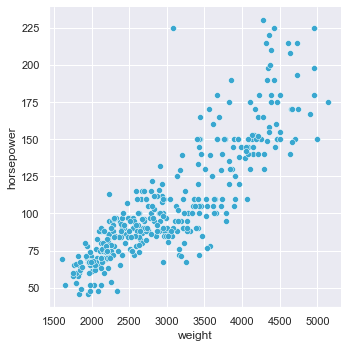

In [19]:
#  Seaborn plot functions create two different types of objects: FacetGrid objects and AxesSubplot objects. 
# The method for adding a title to your plot will differ depending on the type of object it is.

g = sns.relplot(x='weight', y='horsepower', data=mpg, kind='scatter')
type(g)

Text(0.5, 0.98, 'Car Weight vs. Horsepower')

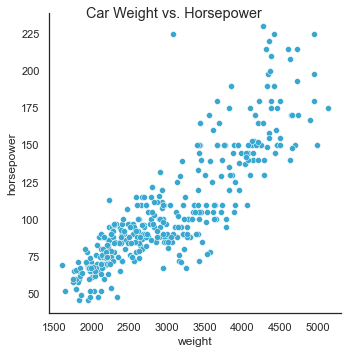

In [22]:
# # Add a title "Car Weight vs. Horsepower"
sns.set_style('white')
g = sns.relplot(x='weight', y='horsepower', data=mpg, kind='scatter')
g.fig.suptitle('Car Weight vs. Horsepower')

### 1.2.2  Adding a title to AxesSubplot
We add a title to a FacetGrid object using "g.fig.suptitle". To add a title to an AxesSubplot object like that from the "box plot" function, assign the plot to a variable and use “g.set_title”. You can also use the “y” parameter here to adjust the height of the title.

### Titles for subplots
Now let's look at what happens if the figure has subplots. Let's say we've divided countries into two groups - group one and group two - and we've set "col" equal to "Group" to create a subplot for each group.
Since g is a FacetGrid object, using "g.fig.suptitle" will add a title to the figure as a whole.

*g = sns.catplot(x='region', y='birthrate', data=gdp_data, kind='box', col='group')*

*g.fig.suptitle('NewTitle', y=1.03)*

To alter the subplot titles, use "g.set_titles" to set the titles for each AxesSubplot. If you want to use the variable name in the title, you can use "col_name" in braces to reference the column value. Here, we've created subplot titles that display as "this is group 2" and "this is group 1".

*g = sns.catplot(x='region', y='birthrate', data=gdp_data, kind='box', col='group')*

*g.fig.suptitle('NewTitle', y=1.03)*

*g.set_titles('This is {col_name}')*


6. Adding axis labels
To add axis labels, assign the plot to a variable and then call the "set" function. Set the parameters "x label" and "y label" to set the desired x-axis and y-axis labels, respectively. This works with both FacetGrid and AxesSubplot objects.

*g = sns.catplot(x='region', y='birthrate', data=gdp_data, kind='box', col='group')*

*g.set(xlabel='NewXLabel', ylabel='NewYLabel')*

*plt.show()*

7. Rotating x-axis tick labels
Sometimes, our tick labels may overlap, making it hard to interpret the plot. One way to address this is by rotating the tick labels. To do this, we don't call a function on the plot object itself. Instead, after we create the plot, we call the matplotlib function "plt.xticks" and set "rotation" equal to 90 degrees. This works with both FacetGrid and AxesSubplot objects.

*plt.xticks(rotation=90)*

[Text(0.5, 0, 'Car Model Year'), Text(0, 0.5, 'Average MPG')]

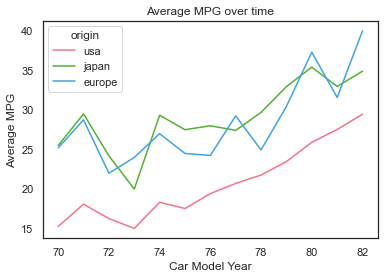

In [26]:
# axes plot title
g= sns.lineplot(x='model_year', y='mpg', hue='origin', data=mpg, ci=None)
g.set_title('Average MPG over time')
g.set(xlabel='Car Model Year', ylabel='Average MPG')

(array([0, 1, 2]),
 [Text(0, 0, 'usa'), Text(1, 0, 'japan'), Text(2, 0, 'europe')])

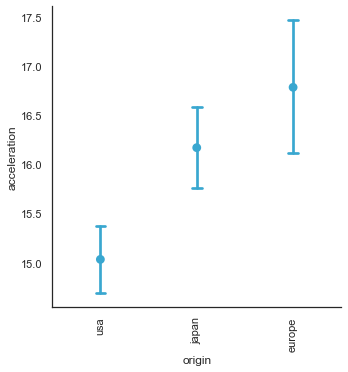

In [27]:
# Create point plot
sns.catplot(x='origin', y='acceleration', data=mpg, kind='point', join=False, capsize=0.1)

# Rotate x-tick labels
plt.xticks(rotation=90)

## 1.3 Summary

1. Getting started
The first thing to recall is simply how to import Seaborn and its related library, Matplotlib. To do this, write "import seaborn as sns" and "import matplotlib.pyplot as plt". Recall also that at the end of your data visualization code, you'll call "plt.show( )" to show the visualization.

*import seaborn as sns*

*import matplotlib.pyplot as plt*

*plt.show()*

2. Relational plots
After you've imported the appropriate libraries, the next thing to do is to choose what type of plot you want to create. Relational plots are plots that show the relationship between two quantitative variables. Examples of relational plots that we've seen in this course are scatter plots and line plots. You can create a relational plot using "relplot( )" and providing it with the x-axis variable name, y-axis variable name, the pandas tidy DataFrame, and the type of plot (either scatter or line).

3. Categorical plots
Categorical plots are another type of plot. These describe the distribution of a quantitative variable within categories given by a categorical variable. Examples of categorical plots we've seen are bar plots, count plots, box plots, and point plots. You can create a categorical plot using "catplot( )" and providing it with the x-axis variable name, y-axis variable name (if applicable), the pandas tidy DataFrame, and the type of plot (either bar, count, box, or point).

4. Adding a third variable (hue)
If we want to add a third dimension to our plots, we can do this in one of two ways. Setting the "hue" parameter to a variable name will create a single plot but will show subgroups that are different colors based on that variable's values.

5. Adding a third variable (row/col)
Alternatively, you can use "relplot( )" and "catplot( )"’s "col" and "row" parameters to graph each subgroup on a separate subplot in the figure.

6. Customization
Once you have the basic plot created, you might want to customize the plot's appearance to improve its readability. You can change the background of the plot using "sns.set_style( )", the color of the main elements using "sns.set_palette( )", and the scale of the plot using "sns.set_context( )".

7. Adding a title
Finally, every plot should be given an informative title and axis labels. Recall the two types of plot objects - FacetGrids and AxesSubplots - and the way to add a title to each of them.

*FacetGrid      relplot( ), catplot( )      g.fig.suptitle( )*

*AxesSubplot    scatterplot( ), countplot( )        g.set_title( )*

8. Final touches
Also recall how to use the "set" function with the "xlabel" and "ylabel" parameters to provide custom x- and y-axis labels, and how to use "plt.xticks" with the "rotation" parameter to rotate the x-tick labels.
